In [1]:
# auto reload
%load_ext autoreload
%autoreload 2


from pathlib import Path
import logging

import elevatr as elv

from dwd_radolan_utils.catchment_area import compute_multiple_catchments, convert_grid_to_radolan_grid
from dwd_radolan_utils.extraction import extract_time_series_from_radar
from dwd_radolan_utils.pysheds_helper.plot_helper import plot_distance_catchment_area


logging.basicConfig(level=logging.INFO)


Mosaicing tiles.


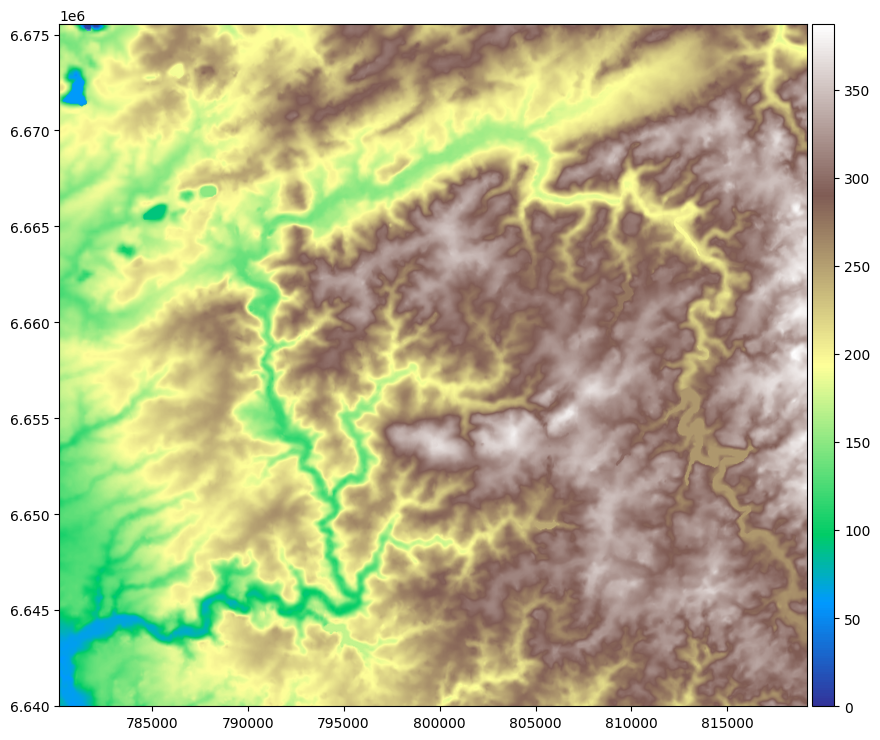

In [ ]:
kluse_dis_wgs84 = (7.158556, 51.255604)

# bounds around kluse_dis_wgs84 
# 1 degree of latitude ≈ 111 km 
# 1 degree of longitude varies by latitude: 111 km × cos(latitude) ->
# 1 degree ≈ 111 km × cos(51.255604°) ≈ 69.15 km

bounds_y_up = 0.05
bounds_x = .15
bounds_y = .15
bounds = (
    kluse_dis_wgs84[0] - bounds_x,
    kluse_dis_wgs84[1] - bounds_y,
    kluse_dis_wgs84[0] + bounds_x + 0.05,
    kluse_dis_wgs84[1] + bounds_y_up,
)

raster = elv.get_elev_raster(locations=bounds, zoom=12, delete_cache=True)
raster.show(cmap='terrain', clip_zero=True)

In [11]:
raster.to_tif("elevation.tif")

In [116]:

data_dir = Path(".")
dist, grid = compute_multiple_catchments([kluse_dis_wgs84], downsample_factor=1, data_dir=data_dir)

INFO:root:Loading DEM from: combined_dgm_mosaic.tif
INFO:root:Saving grid to: cache/combined_dgm


sGrid saved to cache/combined_dgm.json and cache/combined_dgm_mask.npz


INFO:root:Filling pits
INFO:root:Filling depressions


Raster saved to cache/combined_dgm.json, cache/combined_dgm_data.npz, and cache/combined_dgm_mask.npz


INFO:root:Resolving flats
INFO:root:Computing flow directions
INFO:root:Computing flow accumulation


Grid CRS: PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]
Grid extent: (782971.8723859739, 810794.9506817784, 6644429.078967603, 6688896.320172503)
Target coordinates WGS84 (long, lat): (7.158556, 51.255604)
Target coordinates in grid CRS (x, y): (796886.8087351333, 6666632.262368668)
✅ Target coordinates are within grid extent!

Snapped coordinates: x=796883.4115

Using distance data extent: (796883.4115338761, 810775.841424707, 6656276.818351804, 6677010.362274158)
Distance data shape: (1085, 727)
Distance data CRS: PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]
Pour point: (7.158556, 51.255604)
Plot extent with padding: X(796383, 811276), Y(6655777, 6677510)
✅ Basemap loaded successfully


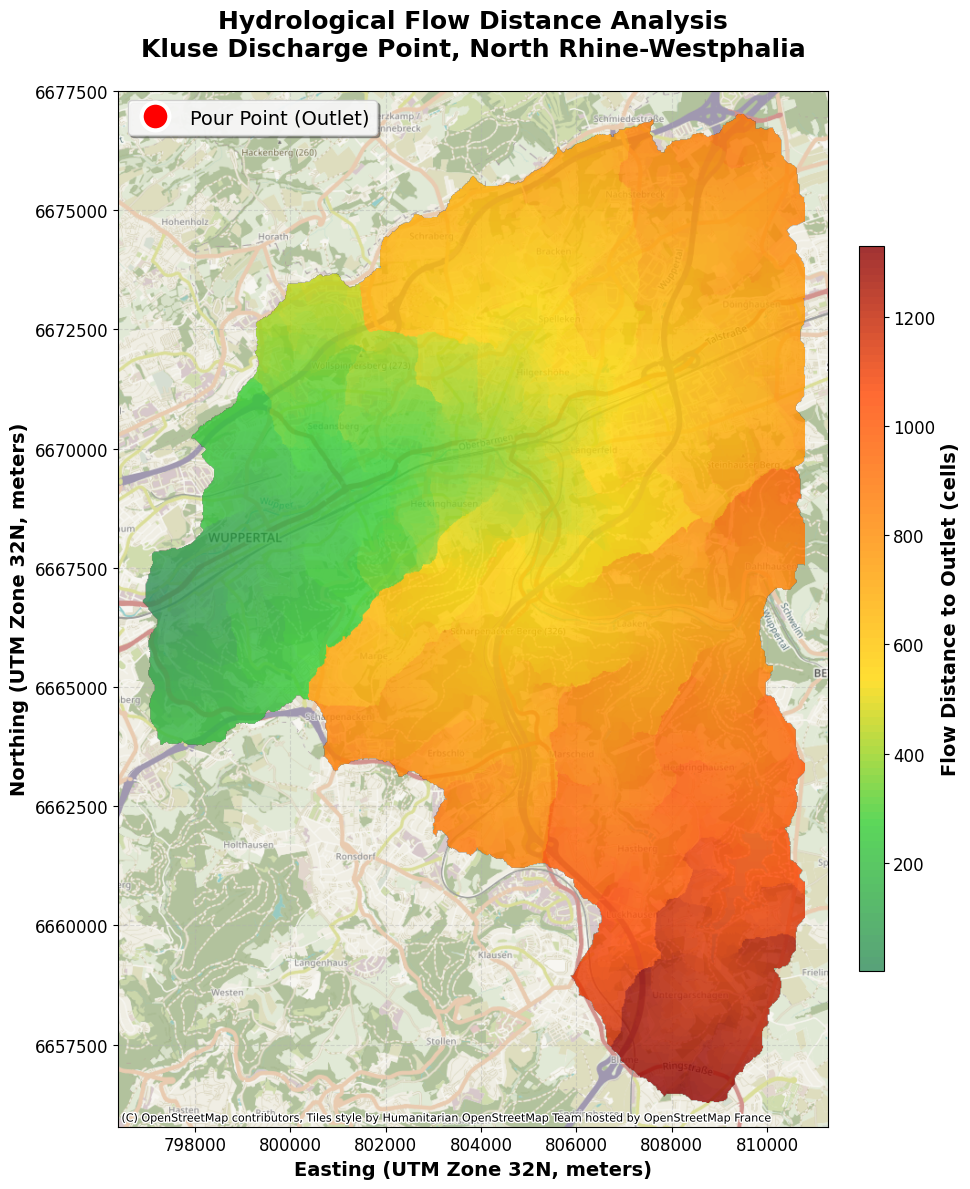


📊 Enhanced Flow Distance Statistics:
   🎯 Pour Point: (7, 51) UTM
   📏 Min distance: 1.0 cells
   📏 Max distance: 1330.0 cells
   📊 Mean distance: 650.8 cells
   📦 Catchment area: 492459 cells
   🗺️  Data extent: (796883.4115338761, 810775.841424707, 6656276.818351804, 6677010.362274158)
   🌍 Real distances (approx):
      Max flow path: 6650 meters
      Catchment area: 1231.1 hectares


In [117]:
plot_distance_catchment_area(grid[0], dist[0], kluse_dis_wgs84[0], kluse_dis_wgs84[1])

In [118]:
new_grid = convert_grid_to_radolan_grid(dist, grid)

INFO:root:Vectorized method: Successfully projected 81 out of 810000 cells to RADOLAN grid


In [ ]:
path = Path("../data/dwd")
ts_array, timestamps = extract_time_series_from_radar(new_grid, path)

INFO:root:Found non-NaN data boundaries: rows [473:486], cols [308:317]
INFO:root:Computed boundaries for extraction: {'min_x': 473, 'max_x': 486, 'min_y': 308, 'max_y': 317}


(1, 900, 900)


  0%|          | 0/3 [00:00<?, ?it/s]